*Marina Prieto Pech*

## 0. Data Loading

For this we're going to use the importing files option so we can upload the file: **worldcup_2018_final_data**



In [1]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving worldcup_2018_final_data.csv to worldcup_2018_final_data.csv
User uploaded file "worldcup_2018_final_data.csv" with length 11871 bytes


In [2]:
import pandas as pd
import io

df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')))

df #for displaying dataframe we have, but not really necessary

,Unnamed: 0,team_name,team_round,goals_scored_open_play_average,goals_scored_set_play_average,goals_scored_average,goals_scored_corner_average,goals_scored_free_kick_average,goals_scored_penalty_average,goals_scored_.throw_in_average,...,fouls_recieved_average,yellow_cards_average,red_cards_average,goalkeeper_position_in_possession_average,goalkeeper_position_out_of_possession_average,goalkeeper_saves_average,shots_on_target_conceded_average,xg_total_average,goals-xG_total,xg_per_shot_average
0,1,Argentina,Round of 16,1.50,0.00,1.50,0.00,0.00,0.00,0.00,...,19.00,2.75,0.00,18.5,15.0,1.50,3.75,1.24,1.04,0.09
1,2,Australia,Group stage,0.00,0.67,0.67,0.00,0.00,0.67,0.00,...,10.00,2.33,0.00,17.0,12.0,3.00,4.67,1.17,-1.50,0.10
2,3,Belgium,Third,2.14,0.14,2.29,0.00,0.00,0.14,0.00,...,10.57,1.57,0.00,14.0,11.0,3.57,4.57,1.70,4.13,0.11
3,4,Brazil,Quarter-finals,1.40,0.20,1.60,0.20,0.00,0.00,0.00,...,14.40,1.40,0.00,16.0,13.0,1.00,1.40,2.47,-4.35,0.12
4,5,Colombia,Round of 16,0.50,1.00,1.50,0.75,0.25,0.00,0.00,...,13.00,2.25,0.25,14.0,8.0,2.50,3.25,0.68,3.28,0.07
5,6,Costa Rica,Group stage,0.33,0.33,0.67,0.33,0.00,0.00,0.00,...,11.67,2.00,0.00,13.0,11.0,3.33,5.00,0.70,-0.09,0.08
6,7,Croatia,Runner-up,1.71,0.29,2.00,0.00,0.14,0.14,0.00,...,15.29,2.14,0.00,11.5,8.5,2.86,4.14,1.49,3.57,0.09
7,8,Denmark,Round of 16,0.50,0.25,0.75,0.00,0.00,0.00,0.25,...,7.00,1.50,0.00,14.0,10.0,4.75,5.00,0.70,0.20,0.07
8,9,Egypt,Group stage,0.33,0.33,0.67,0.00,0.00,0.33,0.00,...,7.33,1.67,0.00,9.5,9.0,3.00,5.00,0.88,-0.63,0.09
9,10,England,Fourth,0.43,1.29,1.71,0.57,0.43,0.57,0.00,...,14.43,1.14,0.00,18.0,14.0,2.43,3.57,1.48,1.61,0.11


This view will be helpful so we can see the data we have and their types, used right after for our feature selection.

### Feature Selection

Only numeric values are useful for our study. Meaning we must create a new data frame subgroup (df_1) that doesnt take into account the team names or team rounds.

In [3]:
exclude = ['team_name', 'team_round']
df_1 = df.loc[:, df.columns.difference(exclude)]

df_1.head()

,Unnamed: 0,bypassed_defenders_average,bypassed_opponents_average,clean_sheets_percentage,clearances_average,compactness_in_possesion_average,compactness_out_of_possession_average,corners_average,crosses_average,crosses_completed_average,...,shots_scored_outside.penalty_area_percentage,steals_attemped_average,steals_completed_average,steals_completed_percentage,width_in_possession_average,width_out_of_possession_average,xg_per_shot_average,xg_total_average,yellow_cards_average,zone5_activities_over25kmh_total
0,1,29,273,0.00,18.50,739,574,6.00,12.50,1.75,...,0.17,16.50,11.25,0.682,42,34,0.09,1.24,2.75,313
1,2,26,291,0.00,23.67,843,454,4.67,12.33,2.00,...,0.00,15.00,9.33,0.622,43,32,0.10,1.17,2.33,368
2,3,49,310,0.43,16.86,811,612,5.71,10.43,2.86,...,0.06,13.43,9.14,0.681,40,34,0.11,1.70,1.57,324
3,4,45,332,0.60,16.20,965,679,8.20,12.80,2.60,...,0.12,17.60,11.40,0.648,44,35,0.12,2.47,1.40,347
4,5,33,270,0.50,25.75,819,613,3.25,12.75,2.00,...,0.17,15.75,11.25,0.714,44,36,0.07,0.68,2.25,331


In [4]:
df_1.shape

(32, 68)

## 1. Principal Component Analysis

After creating the new data frame, we can proceed with the PCA, following the next steps:

### 1.1 Standarization/Normalization

The data has to be [standarized](https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling) or [normalized](https://scikit-learn.org/stable/modules/preprocessing.html#normalization) 




In [16]:
from sklearn import preprocessing

stnd_scaler = preprocessing.StandardScaler()
teams_stnd = stnd_scaler.fit_transform(df_1)

minmax_scaler = preprocessing.MinMaxScaler() 
teams_minmax = minmax_scaler.fit_transform(df_1)

1. Execute the PCA 

Principal Component Analysis helps us reducing the number of data features basing us on the variance between them. We can observe the shape values.



In [17]:
from sklearn.decomposition import PCA

pca_minmax = PCA ()
pca_stnd = PCA ()

X_pca_minmax = pca_minmax.fit_transform(teams_minmax)
X_pca_stnd = pca_stnd.fit_transform(teams_stnd)

X_pca_minmax.shape

(32, 32)

In [18]:
print(f'Standard -> {pca_minmax.explained_variance_ratio_}')
print(f'Min Max -> {pca_minmax.explained_variance_ratio_}')

Standard -> [1.95324151e-01 1.20952666e-01 8.85372757e-02 7.30775112e-02
 5.89029591e-02 5.30332332e-02 4.59280396e-02 4.50647050e-02
 4.06004563e-02 3.79670613e-02 3.09645971e-02 2.91115818e-02
 2.56913024e-02 2.22217007e-02 2.06432843e-02 1.80378601e-02
 1.68296006e-02 1.26447578e-02 1.13665651e-02 9.41575727e-03
 7.27998052e-03 6.45938970e-03 6.13077892e-03 5.75139966e-03
 4.86720411e-03 3.60057210e-03 3.29863952e-03 2.40841171e-03
 1.91039573e-03 1.12453906e-03 8.53623729e-04 3.85208966e-32]
Min Max -> [1.95324151e-01 1.20952666e-01 8.85372757e-02 7.30775112e-02
 5.89029591e-02 5.30332332e-02 4.59280396e-02 4.50647050e-02
 4.06004563e-02 3.79670613e-02 3.09645971e-02 2.91115818e-02
 2.56913024e-02 2.22217007e-02 2.06432843e-02 1.80378601e-02
 1.68296006e-02 1.26447578e-02 1.13665651e-02 9.41575727e-03
 7.27998052e-03 6.45938970e-03 6.13077892e-03 5.75139966e-03
 4.86720411e-03 3.60057210e-03 3.29863952e-03 2.40841171e-03
 1.91039573e-03 1.12453906e-03 8.53623729e-04 3.85208966e-32]

2. The number of components for visualization will be 2, this same value will also be used for clustering (>80% accumulated variance ratio).

In [19]:
import numpy as np

import plotly.graph_objects as go
from plotly.subplots import make_subplots

exp_var_cumul_minmax = np.cumsum(pca_minmax.explained_variance_ratio_)
exp_var_cumul_stnd = np.cumsum(pca_stnd.explained_variance_ratio_)

trace_minmax =  go.Scatter(x=list(range(1, exp_var_cumul_minmax.shape[0] + 1)), y=exp_var_cumul_minmax, name = "MinMax Scaler")
trace_stnd = go.Scatter(x=list(range(1, exp_var_cumul_stnd.shape[0] + 1)), y=exp_var_cumul_stnd, name = "Standard Scaler")

fig = make_subplots(specs=[[{"secondary_y": True}]])
fig.add_trace(trace_minmax)
fig.add_trace(trace_stnd,secondary_y=False)
fig['layout'].update(height = 600, width = 800, title = "MinMax Scaler vs. Standard Scaler", xaxis=dict(
      tickangle=0
    ))
fig.update_layout(xaxis_title="# Components", yaxis_title="Explained Variance")

fig.show()

Both variances resulting by standarization and normalization have minimal changes between eachother, so for now on we are going to keep with standarization results (stnd). For us to reach an 80% variances, most appropriate decision according would be 11 components, but, to reduce results we are going to keep on with a number of components of two.

3. Execute PCA with the specific number of components (or select elements from the previous X_pca matrix)

In [9]:
X_pca = PCA (n_components = 2).fit_transform(teams_stnd)

X_pca

array([[ 4.28008234e+00, -1.00719387e+00],
       [-4.88003548e-01,  2.91819782e+00],
       [ 3.64728010e+00, -3.98915573e+00],
       [ 7.26185508e+00, -1.46131524e+00],
       [-4.34707074e-01, -3.24205972e+00],
       [-3.29442718e+00,  1.87992666e+00],
       [ 2.00094136e+00, -2.99597896e+00],
       [-1.99665238e+00,  1.47432966e+00],
       [-5.74164565e+00,  2.20763256e+00],
       [ 3.61158915e+00, -2.30441026e+00],
       [ 1.09995557e-02, -4.84667029e+00],
       [ 1.02648896e+01,  8.38153476e+00],
       [-3.60317861e+00,  3.06401143e+00],
       [-8.22864165e+00,  6.39308910e-02],
       [ 4.95497705e-04, -1.53143316e+00],
       [-4.13080522e+00, -1.03686305e+00],
       [-6.28317280e-01,  3.38813455e+00],
       [-2.02672605e+00,  2.77419742e+00],
       [-6.99569393e-01, -4.15360805e-02],
       [-5.20403223e+00,  8.82552731e-01],
       [-1.54185709e+00,  1.97667818e+00],
       [ 5.24290709e-01,  9.23272333e-01],
       [ 1.98509532e+00, -1.61072501e+00],
       [-2.

4. Visualization of the Data

Using a 2D chart to visualize the data. The color of the points must be related to the final phase achieved by the teams.


In [10]:
import plotly.express as px
fig = px.scatter(x=X_pca[:,0], y= X_pca[:,1])

for i in range(0,len(X_pca)):
     fig.add_annotation(x = X_pca[i,0], y = X_pca[i,1], text = df.iloc[i,:].team_name)
fig.show()

## 2. K-means

Use the data from PCA to carry out the clustering.


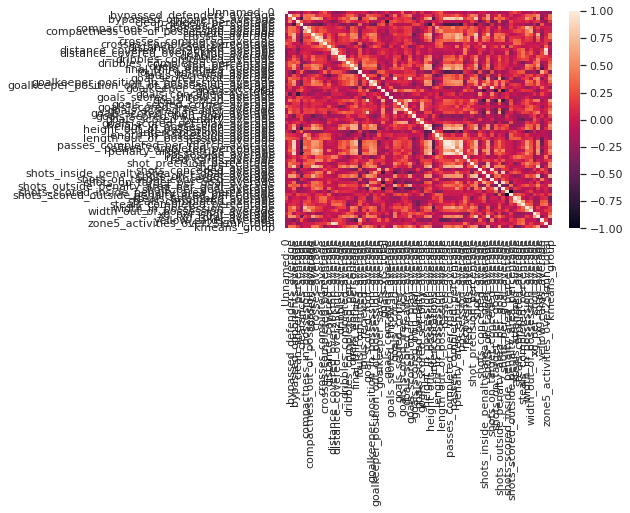

In [44]:
import seaborn as sns
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.2, min_samples=3).fit(teams_stnd)
df_1['dbscan_group'] = db.labels_

mtx_corr = df_1.drop('dbscan_group', axis=1).corr()
sns.heatmap(mtx_corr, xticklabels=mtx_corr.columns, yticklabels=mtx_corr.columns, annot=False)

Since many values are being taken into account, no direct assumptions can be made abbout the relationship between them at first sight

### 2.1 Obtain the parameter **k**

Use the `elbow method`, or the silhouette method or `elbow + silohouette`

1. Execute k-means from 2 to 8


In [27]:
from sklearn.cluster import KMeans
from sklearn import metrics

distortions = []
silhouettes = []

for i in range(2, 8):
    km = KMeans(n_clusters = i, init = 'random', n_init = 10 ,max_iter= 300, tol = 1e-04 ,random_state = 0)
    labels = km.fit_predict(X_pca)
    distortions.append(km.inertia_)
    silhouettes.append(metrics.silhouette_score(X_pca, labels))

We can see the representation of the cluster assigned to each point with "labels"

In [28]:
labels

array([1, 4, 1, 3, 2, 4, 1, 4, 6, 1, 2, 0, 4, 6, 5, 6, 4, 4, 5, 6, 4, 5,
       1, 2, 4, 5, 4, 3, 2, 1, 5, 5], dtype=int32)

2. Plot the computed values of distions and silhouettes


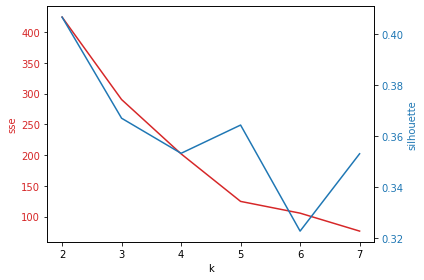

In [29]:
import matplotlib.pyplot as plt

x = [i for i in range(2,8)] # range 2 to 8
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('k')
ax1.set_ylabel('sse', color=color)
ax1.plot(x, distortions, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  # instantiate a second axes that shares the same x-axis

color = 'tab:blue'
ax2.set_ylabel('silhouette', color=color)  # we already handled the x-label with ax1
ax2.plot(x, silhouettes, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()  # otherwise the right y-label is slightly clipped
plt.show()

### 2.3 Execute k-means

Choose the parameters (including k) and execute k-means. Obtain labels and centroids. 

The chosen **k-value will be 5**, since its the k-value with which we can maximize the silhouette while minimizing the distortion; so we proceed as follows:

In [36]:
k = 5
km = KMeans(n_clusters = k, init = 'random', n_init = 10 , max_iter= 300, tol = 1e-04, random_state = 0)
labels = km.fit_predict(X_pca)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X_pca, labels))
      
print('Distortion: %.2f' % km.inertia_)

Silhouette Coefficient: 0.364
Distortion: 124.58


### 2.4 Visualization

Visualization of the clustering results (color = label) using the PCA with two components data. 



In [37]:
import plotly.express as px
fig = px.scatter(x=X_pca[:,0], y= X_pca[:,1], color = km.labels_)

for i in range(0,len(X_pca)):
     fig.add_annotation(x = X_pca[i,0], y = X_pca[i,1], text = df.iloc[i,:].team_name)
fig.show()

### 2.5 Interpretation of the results

The most important part in clustering is the interpretation of the results. Then, It is necessary to describe what is the meaning of each group. for this purpose, use descriptive statistics, charts, and include the "no clustering" variables like *team* and *final round*

1. Introduce the `labels_` in the original dataframe

In [39]:
df['kmeans_group'] = km.labels_

2. Use describe for each group ir order to extract the characteristics of each one of them


In [71]:
df[df['kmeans_group'] == 0].describe()

,Unnamed: 0,goals_scored_open_play_average,goals_scored_set_play_average,goals_scored_average,goals_scored_corner_average,goals_scored_free_kick_average,goals_scored_penalty_average,goals_scored_.throw_in_average,goal_scored_foot_average,goals_scored_header_average,...,red_cards_average,goalkeeper_position_in_possession_average,goalkeeper_position_out_of_possession_average,goalkeeper_saves_average,shots_on_target_conceded_average,xg_total_average,goals-xG_total,xg_per_shot_average,kmeans_group,group
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,...,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.0,11.000000
mean,20.000000,0.484545,0.370909,0.858182,0.052727,0.120909,0.173636,0.022727,0.710000,0.142727,...,0.022727,13.590909,11.727273,2.848182,4.137273,1.029091,-0.555455,0.085455,0.0,17.090909
std,8.843076,0.337916,0.213656,0.326889,0.118667,0.224920,0.225045,0.075378,0.315531,0.165535,...,0.075378,1.854969,2.251262,1.578479,1.491550,0.339513,1.263783,0.024234,0.0,6.992203
min,2.000000,0.000000,0.000000,0.670000,0.000000,0.000000,0.000000,0.000000,0.330000,0.000000,...,0.000000,10.000000,9.500000,0.670000,2.670000,0.580000,-3.440000,0.050000,0.0,5.000000
25%,17.500000,0.330000,0.250000,0.670000,0.000000,0.000000,0.000000,0.000000,0.495000,0.000000,...,0.000000,13.000000,10.750000,1.835000,3.000000,0.830000,-1.050000,0.070000,0.0,12.500000
50%,21.000000,0.500000,0.330000,0.670000,0.000000,0.000000,0.000000,0.000000,0.670000,0.000000,...,0.000000,13.500000,11.000000,3.000000,4.000000,0.910000,-0.360000,0.080000,0.0,17.000000
75%,26.000000,0.670000,0.500000,0.875000,0.000000,0.165000,0.330000,0.000000,0.875000,0.330000,...,0.000000,14.000000,12.000000,3.165000,4.835000,1.180000,0.190000,0.105000,0.0,22.000000
max,31.000000,1.000000,0.670000,1.670000,0.330000,0.670000,0.670000,0.250000,1.330000,0.330000,...,0.250000,17.000000,18.000000,6.250000,7.500000,1.610000,1.360000,0.130000,0.0,27.000000


In [72]:
df[df['kmeans_group'] == 1].describe()

,Unnamed: 0,goals_scored_open_play_average,goals_scored_set_play_average,goals_scored_average,goals_scored_corner_average,goals_scored_free_kick_average,goals_scored_penalty_average,goals_scored_.throw_in_average,goal_scored_foot_average,goals_scored_header_average,...,red_cards_average,goalkeeper_position_in_possession_average,goalkeeper_position_out_of_possession_average,goalkeeper_saves_average,shots_on_target_conceded_average,xg_total_average,goals-xG_total,xg_per_shot_average,kmeans_group,group
count,6.00000,6.000000,6.00,6.000000,6.000000,6.000000,6.000000,6.0,6.000000,6.000000,...,6.0,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.0,6.000000
mean,13.00000,0.386667,0.33,0.725000,0.110000,0.055000,0.165000,0.0,0.500000,0.055000,...,0.0,12.083333,9.666667,3.111667,4.945000,0.915000,-0.570000,0.095000,1.0,9.833333
std,4.97996,0.138804,0.00,0.134722,0.170411,0.134722,0.180748,0.0,0.350885,0.134722,...,0.0,2.059531,1.632993,0.500377,0.998854,0.262583,0.840643,0.010488,0.0,5.671567
min,6.00000,0.330000,0.33,0.670000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.0,9.500000,7.000000,2.670000,3.670000,0.700000,-2.220000,0.080000,1.0,4.000000
25%,10.00000,0.330000,0.33,0.670000,0.000000,0.000000,0.000000,0.0,0.330000,0.000000,...,0.0,10.500000,9.000000,2.752500,4.497500,0.760000,-0.540000,0.090000,1.0,6.500000
50%,13.50000,0.330000,0.33,0.670000,0.000000,0.000000,0.165000,0.0,0.500000,0.000000,...,0.0,12.500000,10.000000,3.000000,5.000000,0.820000,-0.270000,0.095000,1.0,8.500000
75%,15.50000,0.330000,0.33,0.670000,0.247500,0.000000,0.330000,0.0,0.670000,0.000000,...,0.0,13.000000,11.000000,3.247500,5.000000,0.955000,-0.135000,0.100000,1.0,11.250000
max,20.00000,0.670000,0.33,1.000000,0.330000,0.330000,0.330000,0.0,1.000000,0.330000,...,0.0,15.000000,11.000000,4.000000,6.670000,1.410000,0.060000,0.110000,1.0,20.000000


In [73]:
df[df['kmeans_group'] == 2].describe()

,Unnamed: 0,goals_scored_open_play_average,goals_scored_set_play_average,goals_scored_average,goals_scored_corner_average,goals_scored_free_kick_average,goals_scored_penalty_average,goals_scored_.throw_in_average,goal_scored_foot_average,goals_scored_header_average,...,red_cards_average,goalkeeper_position_in_possession_average,goalkeeper_position_out_of_possession_average,goalkeeper_saves_average,shots_on_target_conceded_average,xg_total_average,goals-xG_total,xg_per_shot_average,kmeans_group,group
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0,7.000000,7.000000,...,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0,7.000000
mean,20.285714,0.960000,0.630000,1.590000,0.220000,0.227143,0.182857,0.0,1.090000,0.327143,...,0.064286,13.000000,9.714286,2.261429,3.288571,1.121429,2.351429,0.102857,2.0,22.428571
std,10.061714,0.334614,0.359583,0.367922,0.278628,0.294659,0.188566,0.0,0.274833,0.282826,...,0.110733,1.154701,1.112697,0.506637,0.866457,0.216212,2.516806,0.017995,0.0,10.390014
min,5.000000,0.500000,0.000000,1.200000,0.000000,0.000000,0.000000,0.0,0.750000,0.000000,...,0.000000,11.000000,8.000000,1.670000,2.570000,0.680000,-0.950000,0.070000,2.0,7.000000
25%,13.000000,0.700000,0.450000,1.365000,0.000000,0.000000,0.000000,0.0,0.900000,0.125000,...,0.000000,12.500000,9.000000,1.930000,2.700000,1.110000,0.905000,0.095000,2.0,14.000000
50%,24.000000,1.000000,0.710000,1.500000,0.140000,0.140000,0.200000,0.0,1.000000,0.290000,...,0.000000,13.000000,10.000000,2.000000,3.000000,1.170000,1.200000,0.110000,2.0,29.000000
75%,27.500000,1.245000,0.900000,1.750000,0.325000,0.325000,0.325000,0.0,1.325000,0.500000,...,0.100000,14.000000,10.500000,2.650000,3.525000,1.195000,4.365000,0.115000,2.0,30.500000
max,32.000000,1.330000,1.000000,2.200000,0.750000,0.800000,0.430000,0.0,1.430000,0.750000,...,0.250000,14.000000,11.000000,3.000000,5.000000,1.390000,5.670000,0.120000,2.0,32.000000


In [74]:
df[df['kmeans_group'] == 3].describe()

,Unnamed: 0,goals_scored_open_play_average,goals_scored_set_play_average,goals_scored_average,goals_scored_corner_average,goals_scored_free_kick_average,goals_scored_penalty_average,goals_scored_.throw_in_average,goal_scored_foot_average,goals_scored_header_average,...,red_cards_average,goalkeeper_position_in_possession_average,goalkeeper_position_out_of_possession_average,goalkeeper_saves_average,shots_on_target_conceded_average,xg_total_average,goals-xG_total,xg_per_shot_average,kmeans_group,group
count,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0,7.000000,7.000000,...,7.0,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.000000,7.0,7.000000
mean,10.857143,1.240000,0.524286,1.764286,0.252857,0.152857,0.157143,0.0,1.320000,0.368571,...,0.0,15.000000,11.928571,1.944286,3.240000,1.681429,0.777143,0.105714,3.0,17.285714
std,10.510765,0.630529,0.490947,0.289186,0.263737,0.166304,0.205646,0.0,0.282548,0.221617,...,0.0,2.598076,2.280873,1.131383,1.198694,0.403874,2.844056,0.011339,0.0,11.010817
min,1.000000,0.430000,0.000000,1.500000,0.000000,0.000000,0.000000,0.0,1.000000,0.000000,...,0.0,11.500000,8.500000,0.250000,1.400000,1.240000,-4.350000,0.090000,3.0,1.000000
25%,3.500000,0.750000,0.170000,1.550000,0.000000,0.000000,0.000000,0.0,1.100000,0.270000,...,0.0,13.500000,10.500000,1.250000,2.625000,1.485000,-0.280000,0.100000,3.0,11.500000
50%,7.000000,1.400000,0.290000,1.710000,0.200000,0.140000,0.140000,0.0,1.250000,0.400000,...,0.0,14.000000,12.000000,2.000000,3.570000,1.490000,1.040000,0.110000,3.0,22.000000
75%,16.500000,1.605000,0.875000,1.875000,0.500000,0.250000,0.195000,0.0,1.535000,0.465000,...,0.0,17.000000,13.500000,2.645000,3.945000,1.800000,2.590000,0.110000,3.0,23.500000
max,28.000000,2.140000,1.290000,2.290000,0.570000,0.430000,0.570000,0.0,1.720000,0.710000,...,0.0,18.500000,15.000000,3.570000,4.570000,2.470000,4.130000,0.120000,3.0,28.000000


In [75]:
df[df['kmeans_group'] == 4].describe()

,Unnamed: 0,goals_scored_open_play_average,goals_scored_set_play_average,goals_scored_average,goals_scored_corner_average,goals_scored_free_kick_average,goals_scored_penalty_average,goals_scored_.throw_in_average,goal_scored_foot_average,goals_scored_header_average,...,red_cards_average,goalkeeper_position_in_possession_average,goalkeeper_position_out_of_possession_average,goalkeeper_saves_average,shots_on_target_conceded_average,xg_total_average,goals-xG_total,xg_per_shot_average,kmeans_group,group
count,1.0,1.00,1.00,1.00,1.0,1.00,1.0,1.0,1.00,1.0,...,1.00,1.0,1.0,1.00,1.0,1.00,1.00,1.00,1.0,1.0
mean,12.0,0.33,0.33,0.67,0.0,0.33,0.0,0.0,0.66,0.0,...,0.33,21.0,16.0,3.67,5.0,1.99,-3.96,0.08,4.0,3.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,12.0,0.33,0.33,0.67,0.0,0.33,0.0,0.0,0.66,0.0,...,0.33,21.0,16.0,3.67,5.0,1.99,-3.96,0.08,4.0,3.0
25%,12.0,0.33,0.33,0.67,0.0,0.33,0.0,0.0,0.66,0.0,...,0.33,21.0,16.0,3.67,5.0,1.99,-3.96,0.08,4.0,3.0
50%,12.0,0.33,0.33,0.67,0.0,0.33,0.0,0.0,0.66,0.0,...,0.33,21.0,16.0,3.67,5.0,1.99,-3.96,0.08,4.0,3.0
75%,12.0,0.33,0.33,0.67,0.0,0.33,0.0,0.0,0.66,0.0,...,0.33,21.0,16.0,3.67,5.0,1.99,-3.96,0.08,4.0,3.0
max,12.0,0.33,0.33,0.67,0.0,0.33,0.0,0.0,0.66,0.0,...,0.33,21.0,16.0,3.67,5.0,1.99,-3.96,0.08,4.0,3.0


## 3. Hierarchical Clustering Algorithm

Firstly we compute the similarity matrix

/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_distance_metric.py:14: FutureWarning:

sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3



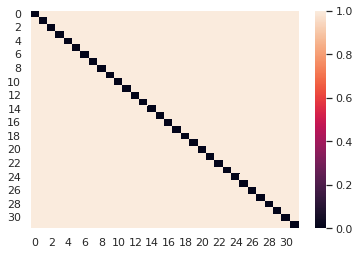

In [45]:
import sklearn.neighbors
dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
matsim = dist.pairwise(teams_stnd)

#Visualization
import seaborn as sns; sns.set()
ax = sns.heatmap(matsim,vmin=0, vmax=1)

After this, we proceed to build the dendrogram of the dataset as follows:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: ClusterWarning:

scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix



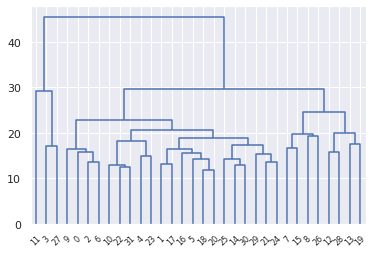

<Figure size 432x288 with 0 Axes>

In [69]:
# 3.2. Building the Dendrogram	
from scipy import cluster
clusters = cluster.hierarchy.linkage(matsim, method = 'complete') 
dend = cluster.hierarchy.dendrogram(clusters, labels = df_1.index, color_threshold=cut)

# 3.2.1 Visualization
f = plt.figure()
plt.show()

Each index relates to the team_name, since we removed them for not being numeric values, we still can work with numeric values taking into account their real meaning.

Cut will be made at distance 30, leaving us with 3 total clusters.

In [53]:
cut  = 30 #@param { type: "slider", min: 1, max: 40, step: 0.5}

In [55]:
labels = cluster.hierarchy.fcluster(clusters, cut , criterion = 'distance')

labels

array([23, 16, 21,  1, 31, 20, 22, 10,  4, 24, 30,  3,  6,  9, 13, 12, 11,
       17, 18,  8, 19, 25, 28, 32, 26, 15,  5,  2,  7, 27, 14, 29],
      dtype=int32)

In [70]:
from sklearn.decomposition import PCA
pca = PCA (n_components = 2)
X_pca = pca.fit_transform(teams_stnd)
print (pca.explained_variance_ratio_)

#plotting orginal points with color related to label
import plotly.express as px
fig = px.scatter(x=X_pca[:,0], y= X_pca[:,1], color = labels)

for i in range(0,len(X_pca)):
     fig.add_annotation(x = X_pca[i,0], y = X_pca[i,1], text = df.iloc[i,:].name)
fig.show()

[0.22251153 0.11246218]
